Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [7]:
NAME = "Joram Erbarth"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

The array after the partition process is A = [1, 5, 6, 2, 3, 4, 7, 8, 9]. The value of i after the process is 5 (if we start counting from 0). 

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [8]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    #x is the pivot point
    x = A[r]
    i = p-1
    #sorting according to the pivot
    for j in range(p,r,1):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1
    raise NotImplementedError()

In [9]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [10]:
def quick_sort(A,p,r):
    #if array larger than 1 we partition and recursively call quicksort
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return A
        
    raise NotImplementedError()

In [11]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


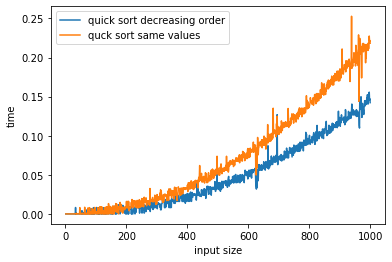

In [6]:
import time 
import matplotlib.pyplot as plt

input_size = []
time_s = []
time_d = []

for i in range(1,1000):
    #define inputs
    A = [x for x in range(i, 0, -1)]
    B = [1 for x in range(i)]
    
    input_size.append(i)
    
    #measure time
    td0= time.time()
    quick_sort(A,0,len(A)-1)
    td1 = time.time() - td0
    time_d.append(td1)
    
    ts0 = time.time()
    quick_sort(B,0,len(B)-1)
    ts1 = time.time() - ts0
    time_s.append(ts1)
    
    
#plot both methods time over the input size    
plt.plot(input_size,time_d, label="quick sort decreasing order")
plt.plot(input_size,time_s, label="quck sort same values")
plt.legend()
plt.xlabel("input size")
plt.ylabel("time")
plt.show()
    
    
    

We can see that both scenarios grow at $n^2$. This is the worst-case scenario for quicksort. In both cases, each partitioning produces one subproblem with size n-1 and one with size 0. If all numbers are the same, all numbers are smaller or equal to the pivot. Therefore, the first subproblem with all numbers smaller or equal to the pivot has the size n-1. There are no values larger than the pivot, so the second subproblem has size 0. If the numbers are in decreasing order, all numbers are greater than the pivot. The first subproblem has size 0 because no numbers are smaller or equal to the pivot and the second subproblem has the size n-1. Both scenarios have the worst-case runtime of quicksort. In the experiment, we can see the exponential growth for both cases, but we can also see that quicksort sorts the same values faster than values in decreasing order. Nevertheless, the asymptotic behavior is the same.  